In [1]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

#get the data onto the notebook
df = pd.read_csv('medical_clean.csv', index_col=0)

#get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [2]:
df.Diabetes.value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [3]:
df.ReAdmis.value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [4]:
#generate a table for a chi-square test
table = pd.crosstab(df.Diabetes, df.ReAdmis)
print(table)

ReAdmis     No   Yes
Diabetes            
No        4591  2671
Yes       1740   998


In [5]:
#get statistic and p-value
chi = stats.chi2_contingency(table)
print(chi)

Chi2ContingencyResult(statistic=0.07983299478166737, pvalue=0.7775238586920562, dof=1, expected_freq=array([[4597.5722, 2664.4278],
       [1733.4278, 1004.5722]]))


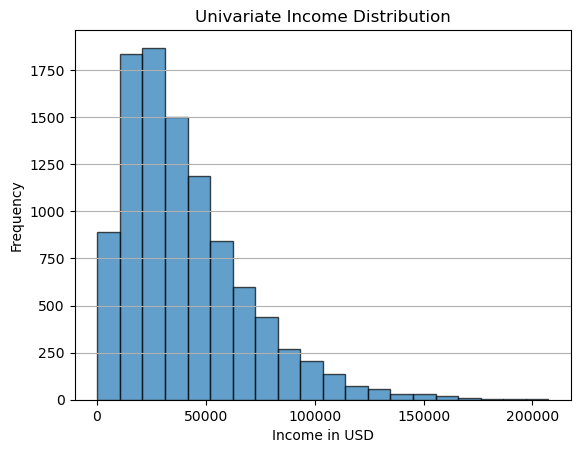

In [6]:
#Create a histogram of Income distribution
plt.hist(data=df, x='Income', bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Income in USD")
plt.ylabel("Frequency")
plt.title("Univariate Income Distribution")
plt.grid(axis='y')
plt.show()

In [7]:
df.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

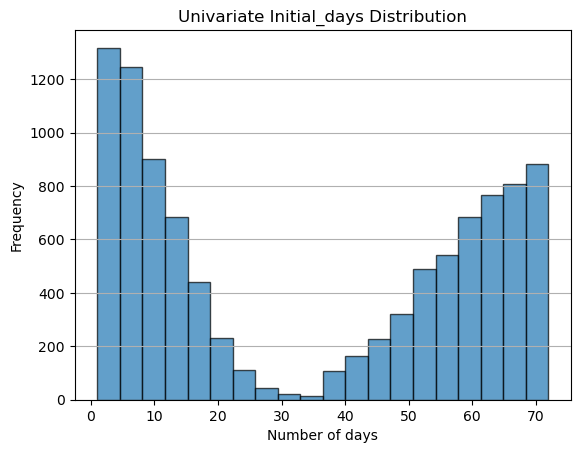

In [8]:
#Create a histogram of Initial days distribution
plt.hist(data=df, x='Initial_days', bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Number of days")
plt.ylabel("Frequency")
plt.title("Univariate Initial_days Distribution")
plt.grid(axis='y')
plt.show()

In [9]:
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [10]:
df.Services.value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

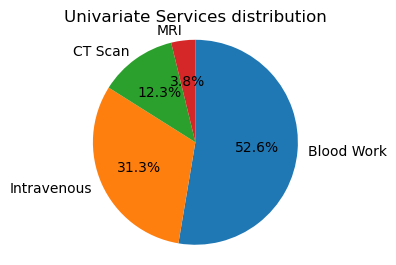

In [11]:
#Univariate exploration of categorical Setvices variable
plt.subplot(1, 2, 1)
plt.title("Univariate Services distribution")
services_counts = df["Services"].value_counts()
services_labels = ["Blood Work", "Intravenous", "CT Scan", "MRI"]
plt.pie(services_counts, labels=services_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

In [12]:
df.Initial_admin.value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

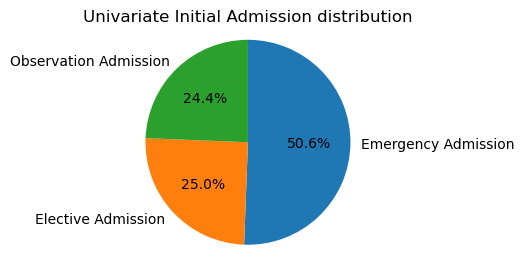

In [13]:
#Univariate exploration of Initial_admin variable
plt.subplot(1, 2, 1)
plt.title("Univariate Initial Admission distribution")
initial_admin_counts = df["Initial_admin"].value_counts()
initioal_admin_labels = ["Emergency Admission", "Elective Admission", "Observation Admission"]
plt.pie(initial_admin_counts, labels=initial_admin_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

In [14]:
df.Additional_charges.describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

In [15]:
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

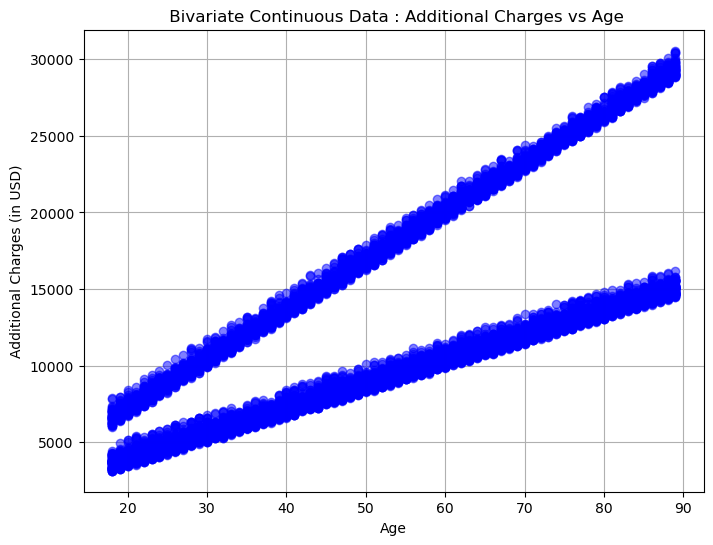

In [16]:
#bivariate statistics for two continuous variables 
plt.figure(figsize=(8, 6))
plt.plot(df['Age'], df['Additional_charges'], 'bo', alpha=0.5)
plt.title(' Bivariate Continuous Data : Additional Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Additional Charges (in USD)')
plt.grid(True)
plt.show()

In [17]:
correlation=df['Age'].corr(df['Additional_charges'])
print(correlation)

0.7168536181504477


In [18]:
df.Area.value_counts()

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

In [19]:
df.Gender.value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

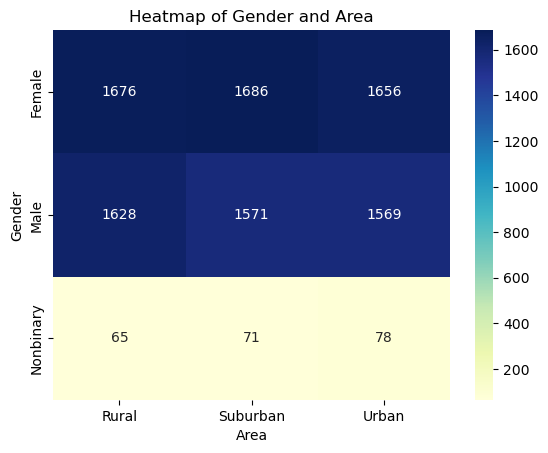

In [24]:
#bivariate statistics for two categorical variables Gender and Area using a heatmap
heatmap_data = pd.crosstab(df['Gender'], df['Area'])

#create a heatmap
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Area')
plt.ylabel('Gender')
plt.title('Heatmap of Gender and Area')
plt.show()

                Gender_encoded  Area_encoded
Gender_encoded        1.000000      0.000293
Area_encoded          0.000293      1.000000


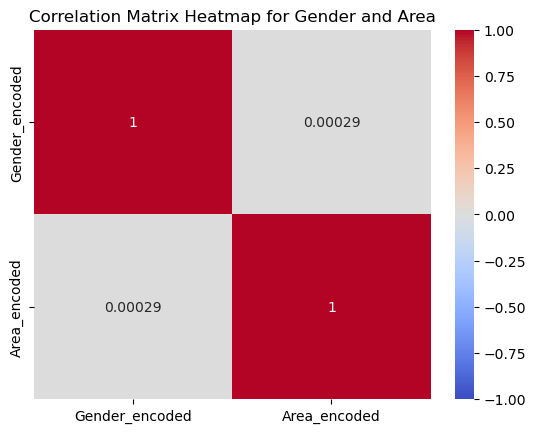

In [27]:
#calculate a correlation matrix
df['Gender_encoded'] = df['Gender'].astype('category').cat.codes
df['Area_encoded'] = df['Area'].astype('category').cat.codes
correlation_matrix = df[['Gender_encoded', 'Area_encoded']].corr()
print(correlation_matrix)

#create correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for Gender and Area')
plt.show()